<a href="https://colab.research.google.com/github/fadhilsalih1994/Image-Processing/blob/master/Computer_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Loading necessary packages and the vgg model
import tensorflow as tf
import keras
import numpy as np
from keras.applications import vgg16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')


553467904/553467096 [==============================] - 3s 0us/step


PIL image size (224, 224)


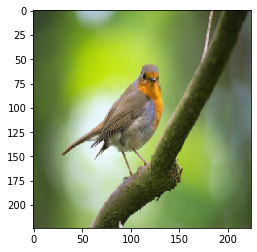

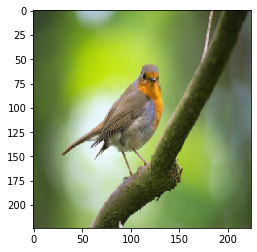

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
[[('n01532829', 'house_finch', 0.5686462), ('n01558993', 'robin', 0.12728973), ('n01534433', 'junco', 0.09035726), ('n01530575', 'brambling', 0.08013727), ('n01537544', 'indigo_bunting', 0.07965335)]]


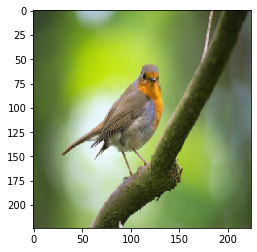

In [4]:
def preprocessing_image(path):
  # load an image in PIL format
  original = load_img(path, target_size=(224, 224))
  print('PIL image size',original.size)
  plt.imshow(original)
  plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
  numpy_image = img_to_array(original)
  plt.imshow(np.uint8(numpy_image))
  plt.show()
  print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
  image_batch = np.expand_dims(numpy_image, axis=0)
  print('image batch size', image_batch.shape)
  plt.imshow(np.uint8(image_batch[0]))
  return(image_batch)

def predicting_image_class(batch):
  # prepare the image for the VGG model
  processed_image = vgg16.preprocess_input(batch.copy())
 
# get the predicted probabilities for each class
  predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
  label = decode_predictions(predictions)
  print (label)

path1 = 'drive/My Drive/Machine Vision/Test Images from Google/bird.jpeg'
path2 = 'drive/My Drive/Machine Vision/Test Images from Google/airplane.jpeg'
path3 = 'drive/My Drive/Machine Vision/Test Images from Google/horse.png'
path4 = 'drive/My Drive/Machine Vision/Test Images from Google/ship.jpeg'
path5 = 'drive/My Drive/Machine Vision/Test Images from Google/frog.jpg'
path6 = 'drive/My Drive/Machine Vision/Test Images from Google/dog.jpg'
path7 = 'drive/My Drive/Machine Vision/Test Images from Google/cat.jpeg'
path8 = 'drive/My Drive/Machine Vision/Test Images from Google/car.jpg'

batch = preprocessing_image(path1)
predicting_image_class(batch)